# DESENVOLVIMENTO E EXECUÇÃO DE PROJETOS DE SOFTWARE 2022.2

Docente: Ryan Ribeiro De Azevedo

Dicente: Thiago Fabricio de Oliveira

# Exercicio 01

Para fazer essa atividade, foi-se utilizado a biblioteca Librosa do python, como a principal biblioteca referente ao processamento de audio.

Ela é uma biblioteca de processamento de áudio em Python amplamente utilizada para análise, manipulação e extração de recursos de áudio. Pois a mesma fornece uma ampla gama de funções e ferramentas para trabalhar com dados de áudio de forma eficiente, como por exemplo:

- Carregamento e conversão de áudio: A Librosa permite o carregamento de áudios em diferentes formatos, como WAV, MP3, OGG, entre outros. Fornecendo tambem funções para converter a taxa de amostragem, tipo de dados e duração dos áudios.

- Pré-processamento de áudio: A biblioteca tambem oferece diversas técnicas de pré-processamento, como a de normalização, remoção de silêncio, filtragem, equalização e muitas outras. Essas técnicas ajudam a preparar os áudios para análise e extração de recursos.

- Extração de recursos de áudio: A Librosa possui funções para extrair diversos recursos úteis de áudio, como espectrograma, mel spectrograma, croma, MFCC (Mel-frequency cepstral coefficients), ritmo, tonalidade, entre outros. Esses recursos são amplamente utilizados em tarefas de processamento de áudio, como classificação, reconhecimento de voz, separação de fontes, entre outros.

- Visualização de áudio: A biblioteca inclui funções para visualizar áudio em forma de gráficos, como gráfico da forma de onda, espectrograma, croma, entre outros. Isso permite uma melhor compreensão dos dados de áudio e facilita a análise visual.

Devido aos exemplos utilizados a Librosa acaba se destacando frente as outras bibliotecas de processsamento de audio como a Essentia e a PyDub.

Prosseguimos então a atividade fazendo a priore o importamento da biblioteca Librosa, e também fazendo o carramento do audio para a atividade.

O audio por sua vez foi um audio gravado em um simples software de gravação de audio, sem que o software tratasse ou tivesse algum melhoramento desse audio, para a finalidade de se exemplificar um arquivo de audio de uma forma mais "bruta".

No carregamento do audio pela biblioteca Librosa teremos que ele sera divido em duas variaveis, que sera:

- audio: Essa variavel recebe os dados do audio em formato digital.

- sr: Essa variavel por sua vez representa a taxa de amostragem em Hz do audio.

In [1]:
# Carramento da biblioteca Librosa
import librosa

# Carregar o áudio
audio_path = 'atividade-01.mp3'
audio, sr = librosa.load(audio_path)

Agora para ver se o audio foi carregado certo e se esta com com seu som em sua normalidade, utilizaremos da biblioteca sounddevide para fazer o carregamento desse audio.

In [2]:
import sounddevice as sd

# Reproduzir o áudio
sd.play(audio, sr)
sd.wait()

Nesse ponto obtive uma surpresa, que foi a do audio cortado no meio de sua execução, investigando um pouco a fundo o problema se apresentou com formato MP3, pois existem alguns arquivos MP3 podem ter problemas de codificação ou metadados incorretos, o que pode levar a uma leitura incorreta da duração do áudio. Fazendo que nesses casos, a biblioteca Librosa possa interpretar erroneamente a duração do áudio.

Para evitar esse tipo de problema teremos então que fazer a conversão desse audio de formato em mp3 para um formato que possui uma maior segurança da integridade dos dados do audio, que no caso é o formato WAV, como a discpiplina busca trabalhar os problemas de software e suas soluções via algoritmo, optei por fazer a conversão via algoritmo em vez de só colocar o arquivo com o formato mais adequado, e para fazer essa convesão sera utilizado a biblioteca pydub.

In [3]:
import pydub

# Caminho do arquivo de áudio em MP3
audio_path_mp3 = 'atividade-01.mp3'

# Caminho de destino para o arquivo WAV convertido
audio_path_wav = 'atividade-01.wav'

# Carregar o arquivo MP3 usando o pydub
audio = pydub.AudioSegment.from_file(audio_path_mp3, format='mp3')

# Converter o áudio para WAV
audio.export(audio_path_wav, format='wav')

<_io.BufferedRandom name='atividade-01.wav'>

Após fazer a conversão, utilizaremos dos mesmo metodos de carregamento e de reprodução de audio anteriormente mostrados para podemos verificar se tudo ocorreu como o planejado.

In [4]:
# Carregar o áudio
audio_path = 'atividade-01.wav'
audio, sr = librosa.load(audio_path)

# Reproduzir o áudio
sd.play(audio, sr)
sd.wait()

Agora que podemos ouvir o audio inteiro oque implica que o mesmo não esta mais cortando, iremos utilizar da biblioteca matplotlib.pyplot para podemos ver graticamento como que esse audio se comporta, para auxiliar o matplotlib iremos justamente utilizar da librosa.display que é a parte do librosa responsavel por fazer esse carremento de dados para plotagem de graficos, afim de observarmos a amplitude desse audio e sua duração.

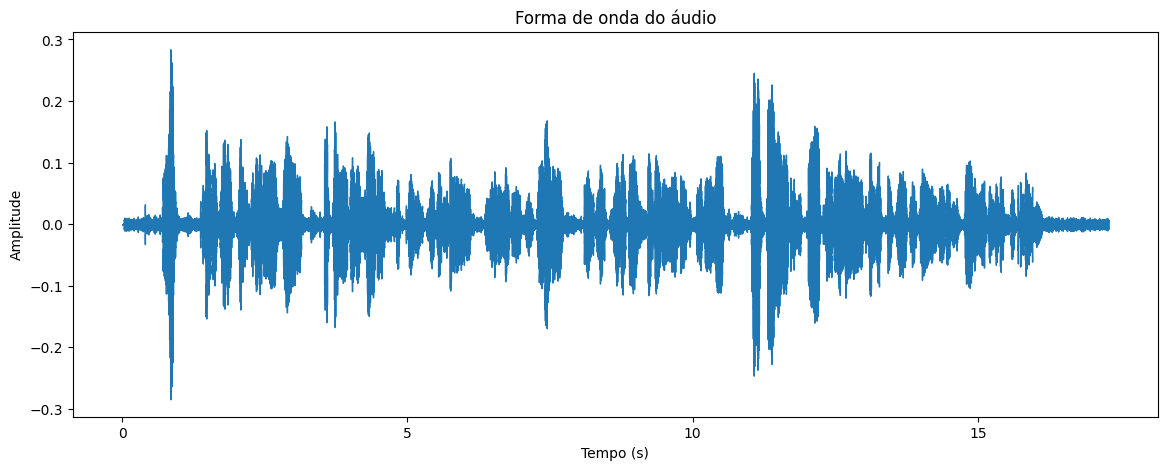

In [5]:

import matplotlib.pyplot as plt
import librosa.display

# Plotar o áudio
plt.figure(figsize=(14, 5))
librosa.display.waveshow(audio, sr=sr)
plt.title('Forma de onda do áudio')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.show()

Fazendo uma visualização mais numerica desses dados, podemos então ver a taxa de amostragem desse audio e sua duração atravez da função print, nas devidas variaveis correspontes.

In [6]:

# Obter a taxa de amostragem
sampling_rate = sr

# Calcular a duração do áudio
duration = len(audio) / sr

print(len(audio))

# Imprimir os resultados
print("Taxa de amostragem: {} Hz".format(sampling_rate))
print("Duração do áudio: {:.2f} segundos".format(duration))

381312
Taxa de amostragem: 22050 Hz
Duração do áudio: 17.29 segundos


Dado que estamos com o audio devidamente carregado sem perda de dados, iremos agora afazer a normalização deste audio e a retirada das partes desse silencio deste audio, após isso tambem iremos ver uma visualização grafica do audio antes desses processamentos e pós esses processamentos.

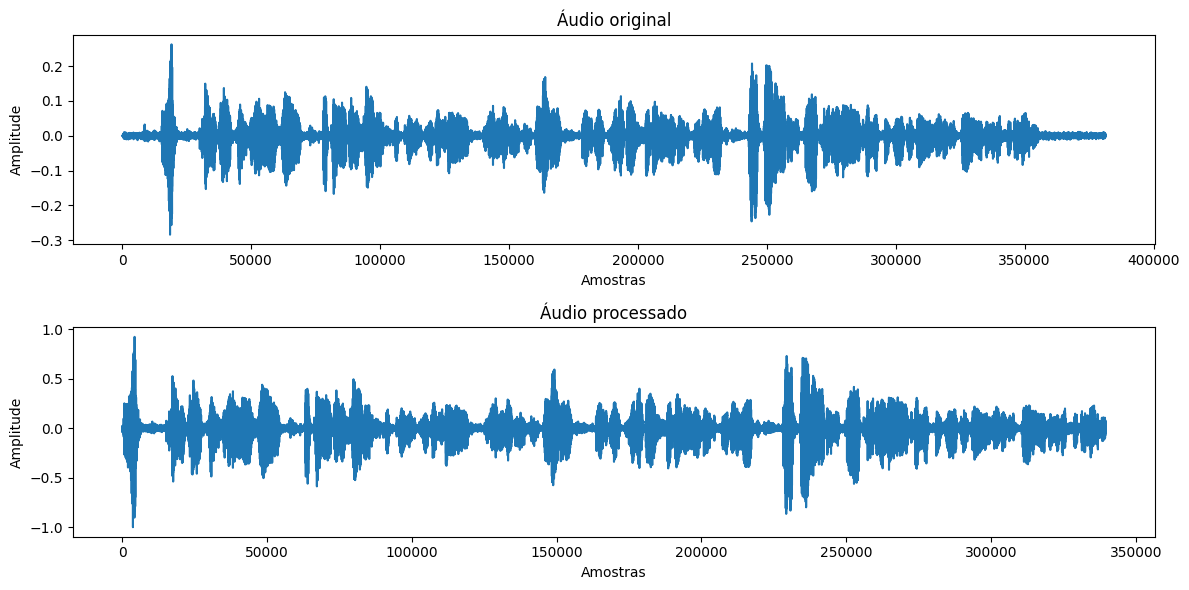

In [7]:
# Normalização
normalized_audio = librosa.util.normalize(audio)

# Remoção de silêncio
trimmed_audio, _ = librosa.effects.trim(normalized_audio, top_db=20)

# Visualização antes e depois do pré-processamento
plt.figure(figsize=(12, 6))

# Áudio original
plt.subplot(2, 1, 1)
plt.plot(audio)
plt.title('Áudio original')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')

# Áudio pré-processado
plt.subplot(2, 1, 2)
plt.plot(trimmed_audio)
plt.title('Áudio processado')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

Reprodução do audio audio original

In [8]:
import sounddevice as sd

sd.play(audio, sr)
sd.wait()

Reprodução do audio com os processamentos de audio executados

In [9]:
sd.play(trimmed_audio, sr)
sd.wait()

Dado que agora ja temos o nosso audio tratado, iremos fazer agora algumas mostragens de inforamções desse audio, o primeiro que iremos fazer e o espectograma deste audio.

Fazendo uma breve explicação sobre oque seria um espectrograma de um audio temos que ele se trata de uma representação visual da variação da intensidade espectral ao longo do tempo. Ele mostra como as diferentes frequências do sinal de áudio estão distribuídas ao longo do tempo.

Para podermos ver essa variação da intesidade espectral ao longo do tempo, precisaremos usar a Transformada de Fourier de Curta Duração (Short-Time Fourier Transform - STFT), onde cada segmento do sinal de áudio é transformado usando a STFT, que justamente calcula a magnitude ou a amplitude complexa do espectro em cada ponto do tempo. A STFT é uma forma de decompor o sinal em suas diferentes componentes de frequência. A biblioteca que estamos estamos a utlizar em toda essa problematica a Librosa, por sua vez possui uma função em sua biblioteca a qual podemos utilizar para fazer essa transformada a qual é librosa.stft(). A STFT ira divide o áudio em segmentos curtos e calcula a magnitude do espectro para cada segmento.

Para melhor visualização e interpretação, é comum converter o espectrograma de magnitude em uma escala logarítmica usando decibéis. Portanto isso sera feito usando a função librosa.amplitude_to_db(), que calcula o logaritmo da magnitude do espectrograma e a escala em decibéis. Essa conversão nos permite visualizar melhor as diferentes intensidades de frequência presentes no áudio.

Apos isso iremos fazer a plotagem do espectrograma para termos assim a sua visualização.

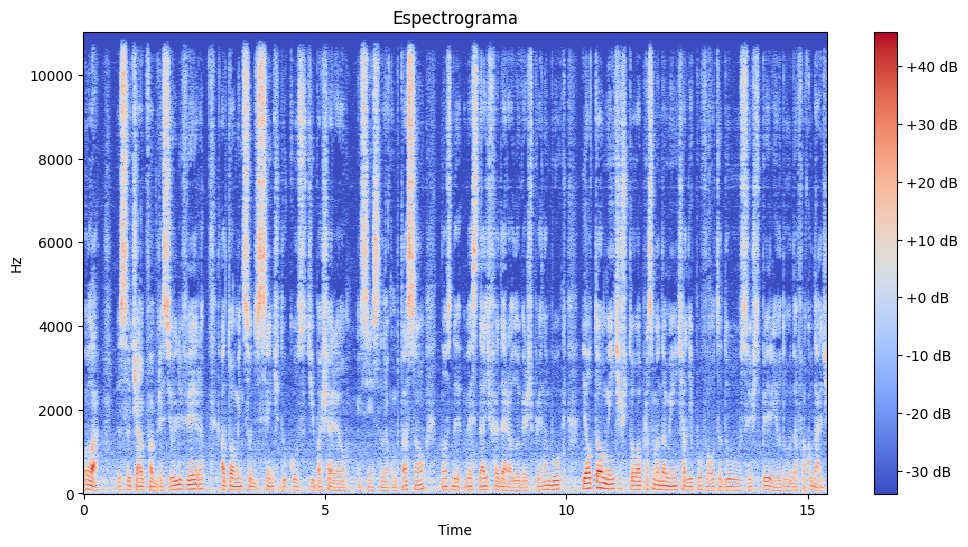

In [10]:
# Calcular o espectrograma
spectrogram = librosa.stft(trimmed_audio)

# Converter para escala de decibéis
spectrogram_db = librosa.amplitude_to_db(abs(spectrogram))

# Plotar o espectrograma
plt.figure(figsize=(12, 6))
librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma')
plt.show()


Após a mostragem do Espectrograma iremos fazer amostragem de outras forma de fazer a visualização das informações contidas nesse audio, a proxima que iremos ver é o Mel Espectrograma

O Mel Espectrograma, também conhecido como Mel-Frequency Spectrogram (MFS), é uma representação do espectrograma de um sinal de áudio em uma escala mel. Ele é amplamente utilizado em processamento de áudio e análise de sinais de áudio para capturar as características perceptivas da audição humana.

A escala mel é uma escala de frequência não linear que se baseia na percepção auditiva humana. Ela é projetada para modelar a sensibilidade do ouvido humano a diferentes frequências. A escala mel é especialmente útil em aplicações de processamento de áudio, pois ajuda a capturar as diferenças perceptuais entre tons musicais e permite uma representação mais discriminativa das frequências de áudio.

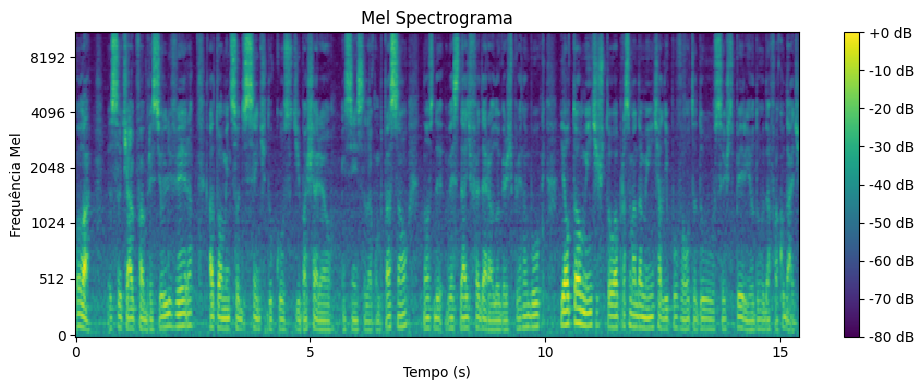

In [11]:
#Import do numpy
import numpy as np

# Calcular o Mel Spectrograma
mel_spectrogram = librosa.feature.melspectrogram(y=trimmed_audio, sr=sr)

# Converter para escala logarítmica (decibéis)
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

# Plotar o Mel Spectrograma
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spectrogram_db, x_axis='time', y_axis='mel', sr=sr, hop_length=512, cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrograma')
plt.xlabel('Tempo (s)')
plt.ylabel('Frequência Mel')
plt.tight_layout()
plt.show()

Seguindo nossas analises e plotagens de graficos, prosseguiremos vendo o MCFF.

Os coeficientes Mel Frequency Cepstral Coefficients (MFCC) são uma representação comumente usada para descrever as características espectrais de um sinal de áudio. Eles são amplamente utilizados em aplicações de processamento de fala e reconhecimento de fala, mas também têm aplicações em outras áreas de processamento de áudio, como classificação de áudio, identificação de música, entre outros.

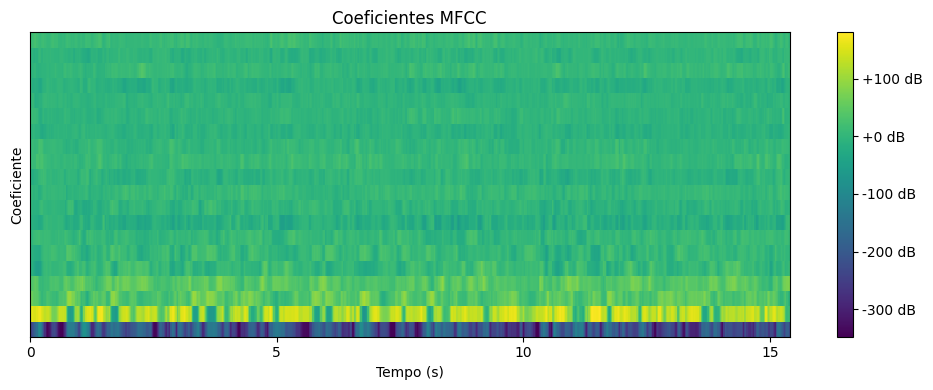

In [12]:
# Calcular os coeficientes MFCC
mfcc = librosa.feature.mfcc(y=trimmed_audio, sr=sr)

# Plotar os coeficientes MFCC
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time', sr=sr, hop_length=512, cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Coeficientes MFCC')
plt.xlabel('Tempo (s)')
plt.ylabel('Coeficiente')
plt.tight_layout()
plt.show()

Agora veremos o contraste espectral do audio.

O contraste espectral é uma medida que descreve a diferença entre os componentes espectrais de um sinal de áudio em diferentes frequências. Ele fornece informações sobre as variações de energia ao longo do espectro de frequência e pode ser usado para caracterizar diferentes propriedades do áudio, como a clareza de um som ou a presença de harmônicos.

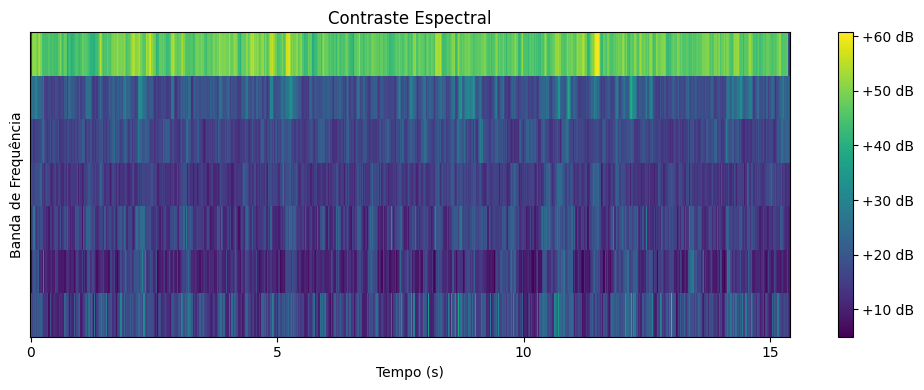

In [13]:
# Calcular o contraste espectral
spectral_contrast = librosa.feature.spectral_contrast(y=trimmed_audio, sr=sr)

# Plotar o contraste espectral
plt.figure(figsize=(10, 4))
librosa.display.specshow(spectral_contrast, x_axis='time', sr=sr, hop_length=512, cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Contraste Espectral')
plt.xlabel('Tempo (s)')
plt.ylabel('Banda de Frequência')
plt.tight_layout()
plt.show()